

<h1><center> Linear Regression</center></h1>



### Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2 id="reading_data">Reading the data in</h2>

In [3]:
df = pd.read_csv("combined_data.csv")
# take a look at the dataset
df.head()



,Unnamed: 0,published_date,Prediction,sentiment_score,Open
0,0,2017-04-18,65.35911,5.500000,65.330002
1,1,2017-04-19,65.33155,7.000000,65.650002
2,2,2017-04-20,65.31837,10.333333,65.459999
3,3,2017-04-21,65.30778,-0.250000,65.669998
4,4,2017-04-24,65.30923,2.666667,67.480003


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,Unnamed: 0,Prediction,sentiment_score,Open
count,708.000000,708.000000,708.000000,708.000000
mean,353.500000,107.239592,5.803872,112.014125
std,204.526282,25.808552,5.048088,29.077222
min,0.000000,65.307780,-23.000000,65.330002
25%,176.750000,89.267366,3.028993,91.487499
50%,353.500000,104.713140,5.492857,107.900002
75%,530.250000,130.561225,7.939189,136.762501
max,707.000000,169.443270,25.500000,190.649994


Lets select some features to explore more.

In [17]:
cdf = df[['Prediction','sentiment_score','Open']]
cdf.head()

,Prediction,sentiment_score,Open
0,65.35911,5.500000,65.330002
1,65.33155,7.000000,65.650002
2,65.31837,10.333333,65.459999
3,65.30778,-0.250000,65.669998
4,65.30923,2.666667,67.480003


we can plot each of these features:

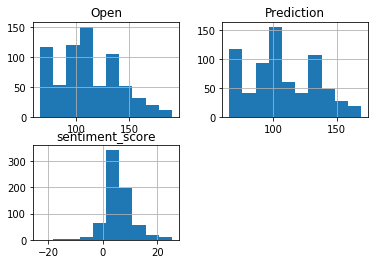

In [18]:
viz = cdf[['Prediction','sentiment_score','Open']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

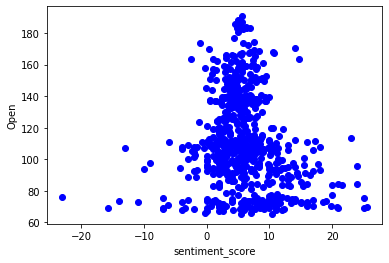

In [21]:
plt.scatter(cdf.sentiment_score, cdf.Open, color='blue')
plt.xlabel("sentiment_score")
plt.ylabel("Open")
plt.show()

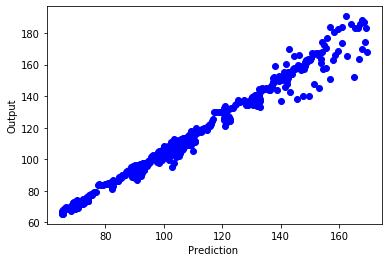

In [29]:
plt.scatter(cdf.Prediction, cdf.Open,color='blue')
plt.xlabel("Prediction ")
plt.ylabel("Output")
plt.show()

#### Creating train and test dataset


In [23]:
msk = np.random.rand(len(df)) < 0.8 #numpy library
train = cdf[msk]
test = cdf[~msk]

In [24]:
len(df) # rows
cdf[msk] # random shuffle 870 rows
cdf[~msk] # random shuffle 197 rows

,Prediction,sentiment_score,Open
2,65.31837,10.333333,65.459999
8,66.05880,-3.500000,68.910004
12,67.58708,5.500000,68.900002
23,68.14751,-4.000000,67.889999
26,67.99020,6.000000,68.970001
...,...,...,...
682,158.72383,3.951220,166.050003
685,155.58733,-0.288889,158.160004
687,153.10268,-0.111111,145.300003
691,145.46770,5.955556,138.000000


<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

#### Train data distribution

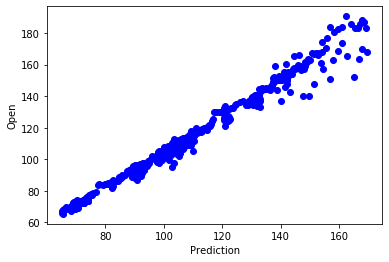

In [30]:
plt.scatter(train.Prediction, train.Open,  color='blue')
plt.xlabel("Prediction")
plt.ylabel("Open")
plt.show()

#### Modeling
Using sklearn package to model data.

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression() # call the model
train_x = np.asanyarray(train[['Prediction']]) # GROUNF TRUTH INDEPENDENT VARIABLE 
train_y = np.asanyarray(train[['Open']]) # GROUND TRUTH response variable
regr.fit (train_x, train_y) # fit the model
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.12202712]]
Intercept:  [-8.31215162]


__Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 


#### Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

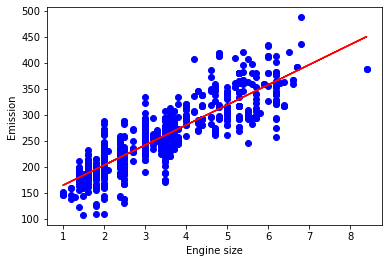

In [34]:
plt.scatter(train.Prediction, train.Open,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Prediction")
plt.ylabel("Open")

In [52]:
np.shape(regr.coef_[0][0]*train_x) # 870 by 1
np.shape(regr.intercept_) # the first entry of the array

(1,)

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. 

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Prediction']]) # GROUND TRUTH USED FOR PREDICTION
test_y = np.asanyarray(test[['Open']]) # GROUND TRUTH
test_y_hat = regr.predict(test_x) #PREDICTED VALUE

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))   
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 2.38
Residual sum of squares (MSE): 14.32
R2-score: 0.98
